In [2]:
from pathlib import Path
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

c:\Users\m8rqu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
# Read the sales data
file_path = Path("C:/Users/m8rqu/Documents/Data BootCamp/wine/wine_data/WineQT.csv")
df_wine = pd.read_csv(file_path)

# Display sample data
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [18]:
df_wine=df_wine.drop('Id', axis = True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [20]:
df_wine.shape

(1143, 12)

In [22]:
duplicate_check = df_wine[df_wine.duplicated()]
duplicate_check

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
46,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
64,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
65,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
71,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,7.5,0.380,0.57,2.30,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6
1113,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1114,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1116,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5


In [25]:
df_wine = df_wine.drop_duplicates()
df_wine.shape

(1018, 12)

In [26]:
missing_data = df_wine.isnull().sum()
missing_data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
summary_wine = df_wine.describe()
summary_wine.transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1018.0,8.288507,1.741324,4.60000,7.100000,7.900000,9.100000,15.90000
volatile acidity,1018.0,0.533541,0.183167,0.12000,0.390000,0.520000,0.645000,1.58000
citric acid,1018.0,0.268802,0.196229,0.00000,0.090000,0.250000,0.420000,1.00000
residual sugar,1018.0,2.524411,1.314850,0.90000,1.900000,2.200000,2.600000,15.50000
chlorides,1018.0,0.087187,0.048506,0.01200,0.070000,0.079000,0.090000,0.61100
free sulfur dioxide,1018.0,15.648821,10.176525,1.00000,7.000000,13.000000,21.000000,68.00000
total sulfur dioxide,1018.0,46.325639,33.123533,6.00000,21.000000,38.000000,62.000000,289.00000
density,1018.0,0.996700,0.001916,0.99007,0.995572,0.996665,0.997827,1.00369
pH,1018.0,3.311503,0.157775,2.74000,3.210000,3.310000,3.400000,4.01000
sulphates,1018.0,0.656817,0.167542,0.33000,0.550000,0.620000,0.720000,2.00000


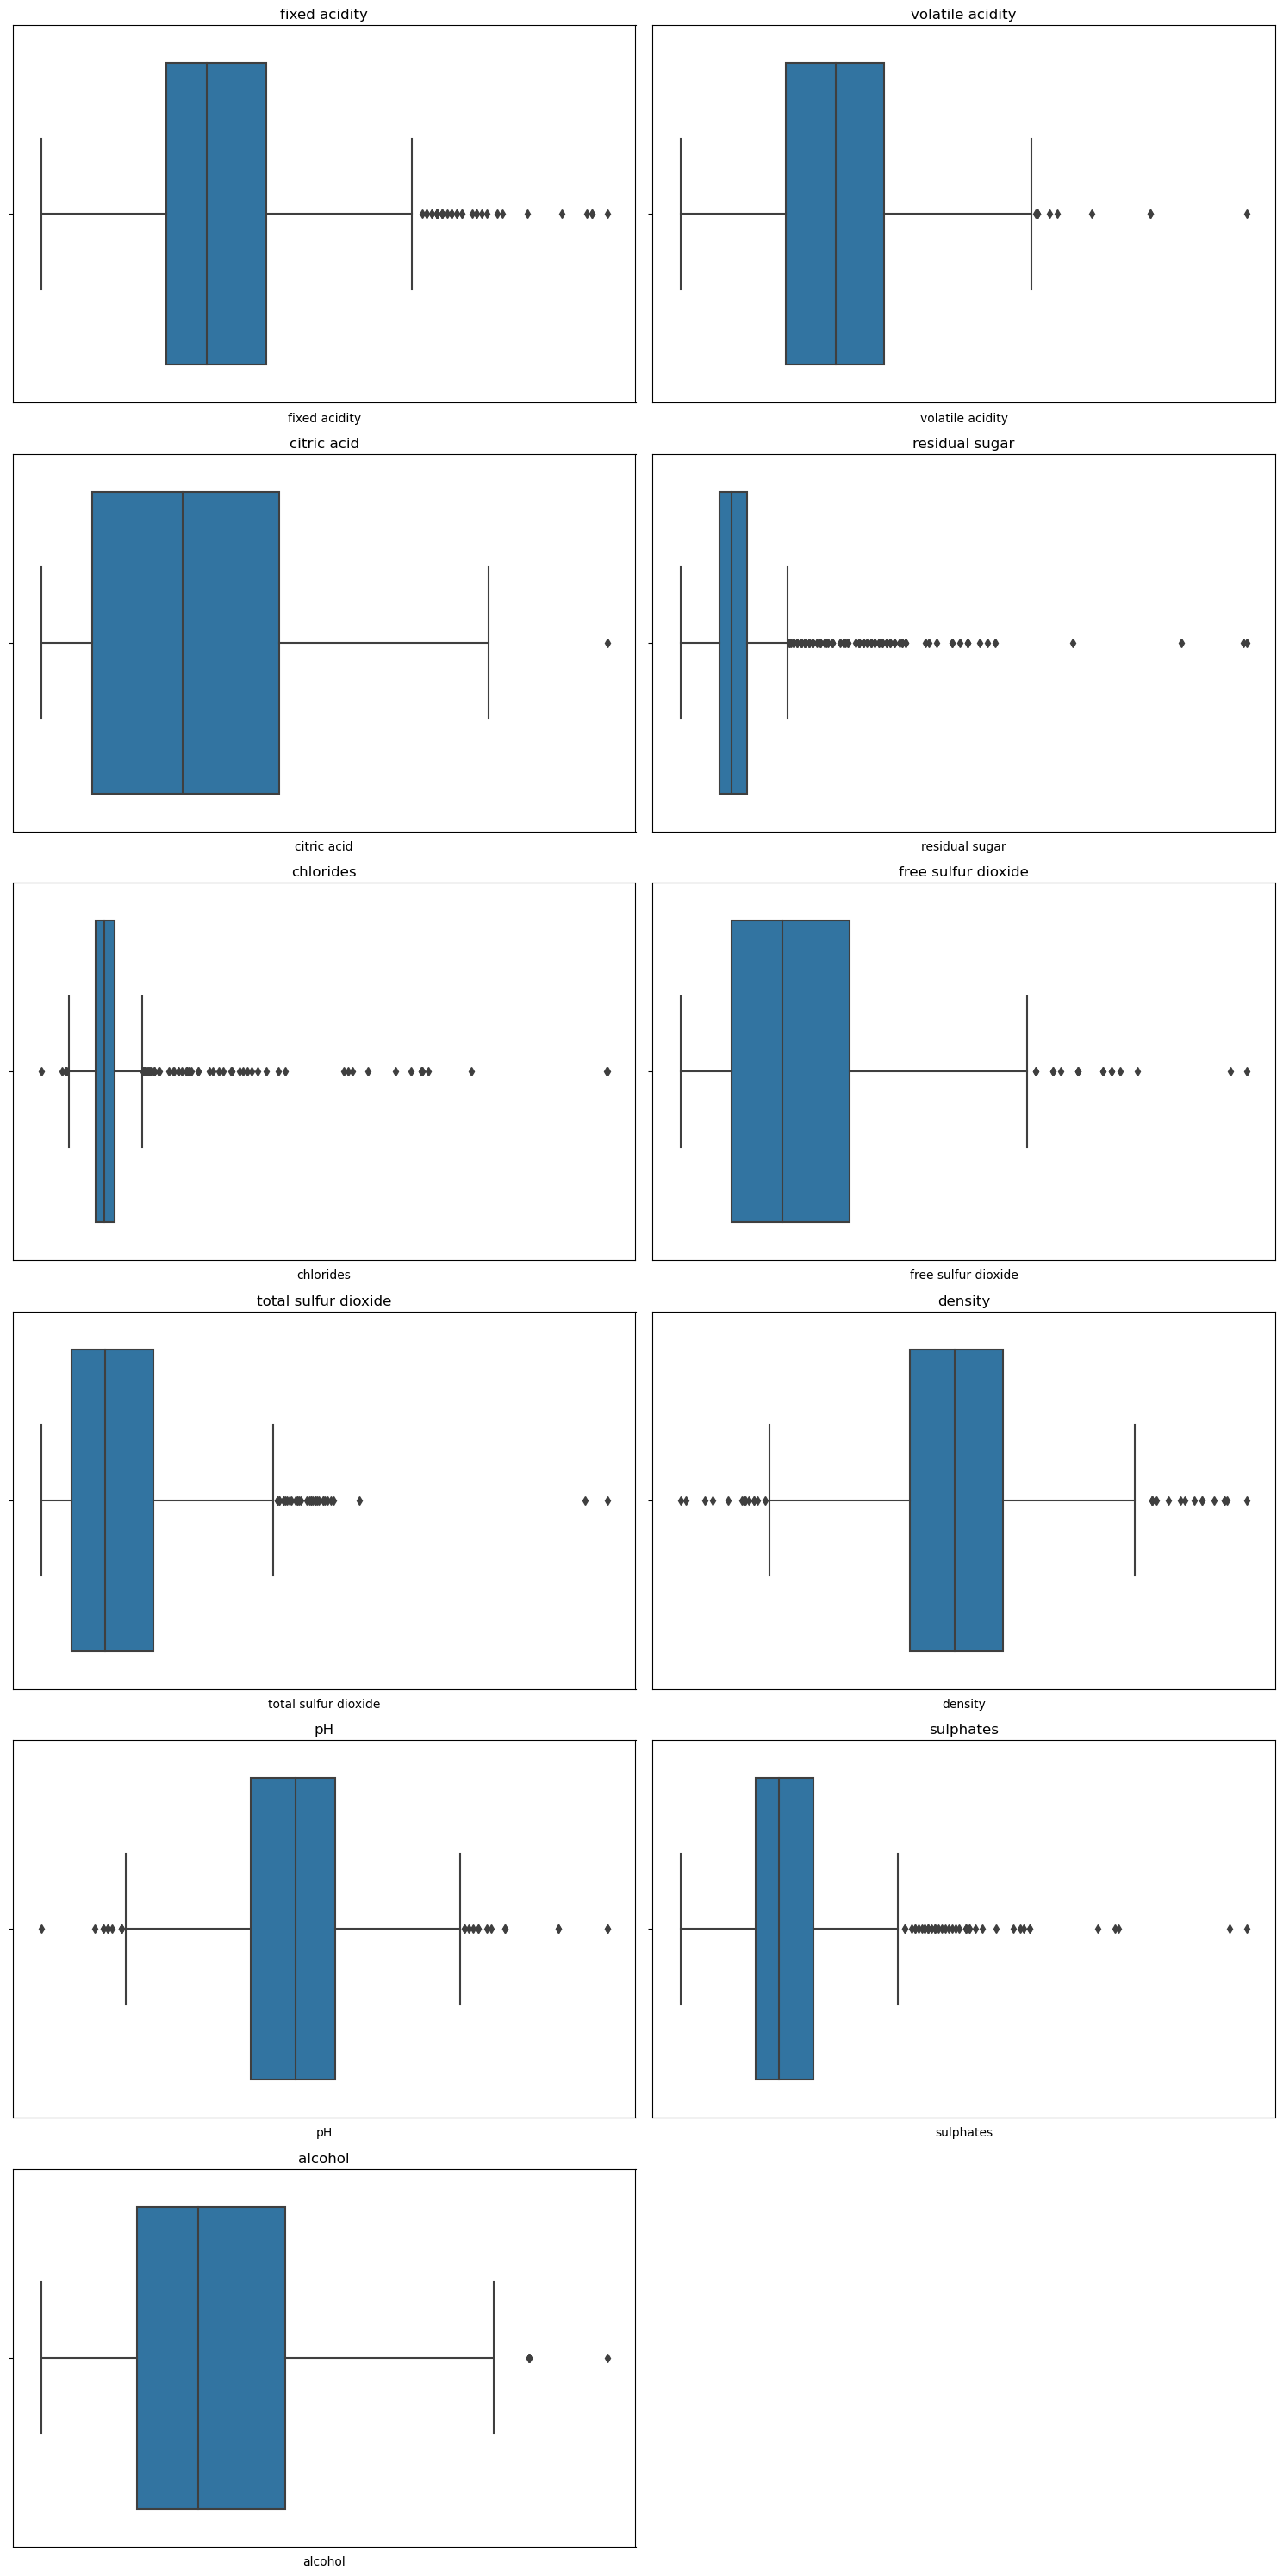

In [31]:
input_columns = df_wine.columns[:-1].tolist()  # Exclude the last column

# Set up subplots
num_columns = len(input_columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot box plots for each selected variable
for i, column in enumerate(input_columns):
    sns.boxplot(x=df_wine[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xticks([])  # Remove existing x-axis ticks
    axes[i].set_xticklabels([])  # Remove existing x-axis tick labels
    axes[i].tick_params(axis='x', rotation=90)  # Set the rotation angle

# Remove empty subplots, if any
for j in range(num_columns, num_rows * 2):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Removing Outliers

wine_columns = []
for wine in wine_columns:
    Q1 = 


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']